<a href="https://colab.research.google.com/github/beccaenagy/CO-State-data/blob/main/Colorado_Map_with_Emission_from_TRI_that_are_TAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
!pip install contextily

import contextily as ctx

# Load Colorado shapefile
colorado_map = gpd.read_file('/content/drive/My Drive/cb_2018_us_state_20m.shp')


# Ensure that your data is in Web Mercator projection (EPSG:3857) as it's required by most tile services
colorado_map = colorado_map.to_crs(epsg=3857)
gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 15))
colorado_map.plot(ax=ax, color='lightgray', edgecolor='k')
gdf.plot(ax=ax, markersize=gdf['Total Emissions'] * 0.01, alpha=0.5, color='red')
gdf.set_crs(epsg=4326, inplace=True)
gdf = gdf.to_crs(epsg=3857)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # You can change the source for a different basemap style
ax.set_title("Emissions from Facilities in Colorado")
plt.show()

colorado_map = colorado_map[colorado_map['STUSPS'] == 'CO']

# Load the facilities data
facilities_data = pd.read_csv('https://raw.githubusercontent.com/beccaenagy/CO-State-data/main/Emissions%20with%20lat%20and%20long%20-%20Sheet1%20(7).csv')

# Split the 'Lat + Long' column into separate 'Latitude' and 'Longitude' columns
facilities_data[['Latitude', 'Longitude']] = facilities_data['Lat + Long'].str.split(',', expand=True).astype(float)

# Convert facilities data to geopandas dataframe
gdf = gpd.GeoDataFrame(
    facilities_data,
    geometry=gpd.points_from_xy(facilities_data.Longitude, facilities_data.Latitude)
)

# Define a scaling factor for your emissions data to visualize them
scaling_factor = 0.01  # or even smaller if needed

cities = gpd.read_file('/content/drive/My Drive/tl_rd22_08_arealm.shp')
cities = cities.to_crs(colorado_map.crs)

# Plotting
fig, ax = plt.subplots(figsize=(10, 15))
colorado_map.plot(ax=ax, color='lightgray', edgecolor='k')
cities.plot(ax=ax, color='black', markersize=10)  # Plot cities
gdf.plot(ax=ax, markersize=gdf['Total Emissions'] * 0.01, alpha=0.5, color='red')
plt.title("Emissions from Facilities in Colorado")
plt.show()


Mounted at /content/drive


ValueError: ignored

Mounted at /content/drive


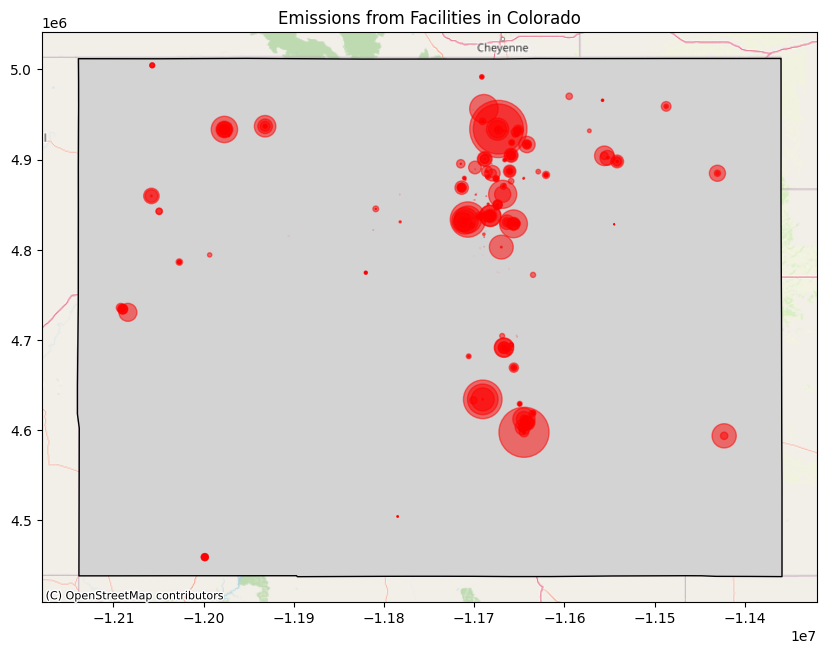

In [27]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
!pip install contextily
import contextily as ctx

# Load Colorado shapefile
colorado_map = gpd.read_file('/content/drive/My Drive/cb_2018_us_state_20m.shp')
colorado_map = colorado_map[colorado_map['STUSPS'] == 'CO']

# Load the facilities data
facilities_data = pd.read_csv('https://raw.githubusercontent.com/beccaenagy/CO-State-data/main/Emissions%20with%20lat%20and%20long%20-%20Sheet1%20(7).csv')

# Split the 'Lat + Long' column into separate 'Latitude' and 'Longitude' columns
facilities_data[['Latitude', 'Longitude']] = facilities_data['Lat + Long'].str.split(',', expand=True).astype(float)

# Convert facilities data to geopandas dataframe
gdf = gpd.GeoDataFrame(
    facilities_data,
    geometry=gpd.points_from_xy(facilities_data.Longitude, facilities_data.Latitude)
)
gdf.set_crs(epsg=4326, inplace=True)  # Set initial CRS

# Ensure that your data is in Web Mercator projection (EPSG:3857) as it's required by most tile services
colorado_map = colorado_map.to_crs(epsg=3857)
gdf = gdf.to_crs(epsg=3857)



# Plotting
fig, ax = plt.subplots(figsize=(10, 15))
colorado_map.plot(ax=ax, color='lightgray', edgecolor='k')
gdf.plot(ax=ax, markersize=gdf['Total Emissions'] * 0.01, alpha=0.5, color='red')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Add basemap for context
plt.title("Emissions from Facilities in Colorado")
plt.show()


Mounted at /content/drive


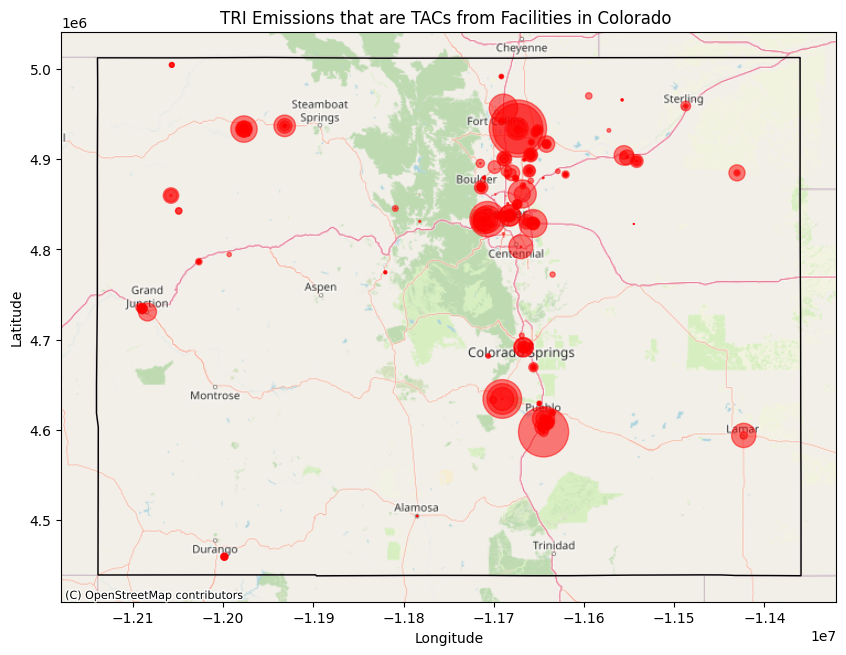

In [33]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from google.colab import drive
!pip install contextily
import contextily as ctx

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Load Colorado shapefile
colorado_map = gpd.read_file('/content/drive/My Drive/cb_2018_us_state_20m.shp')
colorado_map = colorado_map[colorado_map['STUSPS'] == 'CO']

# Convert Colorado shape to Web Mercator projection
colorado_map = colorado_map.to_crs(epsg=3857)

# Load the facilities data
facilities_data = pd.read_csv('https://raw.githubusercontent.com/beccaenagy/CO-State-data/main/Emissions%20with%20lat%20and%20long%20-%20Sheet1%20(7).csv')

# Split the 'Lat + Long' column into separate 'Latitude' and 'Longitude' columns
facilities_data[['Latitude', 'Longitude']] = facilities_data['Lat + Long'].str.split(',', expand=True).astype(float)

# Convert facilities data to geopandas dataframe and set its CRS
gdf = gpd.GeoDataFrame(
    facilities_data,
    geometry=gpd.points_from_xy(facilities_data.Longitude, facilities_data.Latitude),
    crs="EPSG:4326"  # This assumes the Latitude and Longitude are in the WGS 84 coordinate system
)
gdf = gdf.to_crs(epsg=3857)  # Convert to Web Mercator projection

# Plotting
fig, ax = plt.subplots(figsize=(10, 15))

# Plot just the boundaries of Colorado without filling
colorado_map.boundary.plot(ax=ax, color='black', linewidth=1)

# Add the detailed basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Plot the emissions data on top
gdf.plot(ax=ax, markersize=gdf['Total Emissions'] * 0.01, alpha=0.5, color='red')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title("TRI Emissions that are TACs from Facilities in Colorado ")
plt.show()


Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


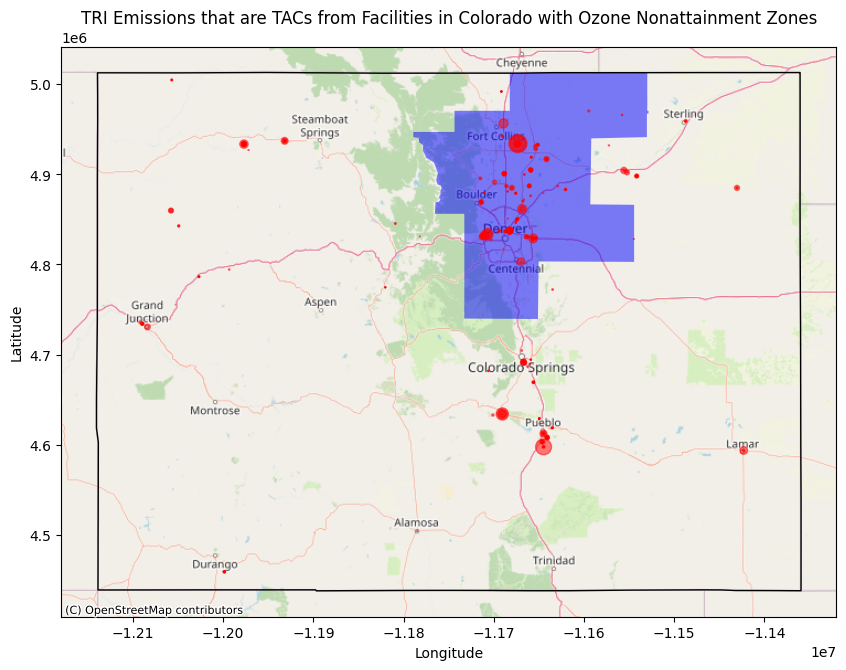

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from google.colab import drive
!pip install contextily
import contextily as ctx

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Load Colorado shapefile
colorado_map = gpd.read_file('/content/drive/My Drive/cb_2018_us_state_20m.shp')
colorado_map = colorado_map[colorado_map['STUSPS'] == 'CO']

# Convert Colorado shape to Web Mercator projection
colorado_map = colorado_map.to_crs(epsg=3857)

# Load the Ozone Nonattainment zone shapefile
ozone_nonattainment = gpd.read_file('/content/drive/My Drive/Nonattainment_Area_-_8_hr_Ozone_(2015_Standard).shp')
ozone_nonattainment = ozone_nonattainment.to_crs(epsg=3857)

# Filter out only the nonattainment zones that are within Colorado
ozone_nonattainment = gpd.sjoin(ozone_nonattainment, colorado_map, op='intersects')
ozone_nonattainment = ozone_nonattainment[ozone_nonattainment.centroid.within(colorado_map.geometry.iloc[0])]

# Load the facilities data
facilities_data = pd.read_csv('https://raw.githubusercontent.com/beccaenagy/CO-State-data/main/Emissions%20with%20lat%20and%20long%20-%20Sheet1%20(7).csv')

# Split the 'Lat + Long' column into separate 'Latitude' and 'Longitude' columns
facilities_data[['Latitude', 'Longitude']] = facilities_data['Lat + Long'].str.split(',', expand=True).astype(float)

# Convert facilities data to geopandas dataframe and set its CRS
gdf = gpd.GeoDataFrame(
    facilities_data,
    geometry=gpd.points_from_xy(facilities_data.Longitude, facilities_data.Latitude),
    crs="EPSG:4326"  # This assumes the Latitude and Longitude are in the WGS 84 coordinate system
)
gdf = gdf.to_crs(epsg=3857)  # Convert to Web Mercator projection

# Plotting
fig, ax = plt.subplots(figsize=(10, 15))

# Plot just the boundaries of Colorado without filling
colorado_map.boundary.plot(ax=ax, color='black', linewidth=1)

# Plot the Ozone Nonattainment zones
ozone_nonattainment.plot(ax=ax, color='blue', alpha=0.5)

# Add the detailed basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Plot the emissions data on top
gdf.plot(ax=ax, markersize=gdf['Total Emissions'] * 0.001, alpha=0.5, color='red')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title("TRI Emissions that are TACs from Facilities in Colorado with Ozone Nonattainment Zones")
plt.show()


In [4]:
fig.savefig('/content/drive/My Drive/colorado_emissions_map_with_nonattainment_zone.png', dpi=300, bbox_inches='tight')
